# Vizualizace dat žebříčků ČSFD
Autor: Jiří Čech

## README
Tento Jupyter Notebook je univerzální pro všechny žánry. Stačí v řádku `df = pd.read_json("results/zanr.json")` vyměnit `zanr.json` soubor za požadovaný žánr. Například 
`df = pd.read_json("results/sci_fi.json")`.

Pak je nutné spustit všechny bloky. Záložka `Cell->Run All`.

Spuštění ověřeno u:
- Distribuce `Anaconda 2021.05`

## Načtení nascrapovaných dat z ČSFD

In [223]:
import pandas as pd
import matplotlib.pyplot as plt

from collections import Counter

df = pd.read_json("results/akcni.json")
df

,title,genres,origin,year,rating_value,rating_count,review_count,based_on,directors,scenarists,actors,musicians,producers,position
0,Terminátor 2: Den zúčtování,"[Akční, Sci-Fi, Thriller]","[USA, Francie]",1991,90.817075,78010,1859.0,[],[James Cameron],"[James Cameron, William Wisher Jr.]","[Arnold Schwarzenegger, Linda Hamilton, Edward...",[Brad Fiedel],[James Cameron],1
1,Pán prstenů: Společenstvo Prstenu,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",2001,90.484977,106335,1920.0,[John Ronald Reuel Tolkien (kniha)],[Peter Jackson],"[Fran Walsh, Philippa Boyens, Peter Jackson]","[Elijah Wood, Ian McKellen, Noel Appleby, Vigg...",[Howard Shore],"[Peter Jackson, Fran Walsh, Barrie M. Osborne]",2
2,Pán prstenů: Návrat krále,"[Fantasy, Dobrodružný, Akční]","[USA, Nový Zéland]",2003,90.410795,98857,1600.0,[John Ronald Reuel Tolkien (kniha)],[Peter Jackson],"[Fran Walsh, Philippa Boyens, Peter Jackson]","[Elijah Wood, Noel Appleby, Billy Boyd, Domini...",[Howard Shore],"[Peter Jackson, Fran Walsh, Barrie M. Osborne]",3
3,Temný rytíř,"[Akční, Drama, Krimi, Thriller]","[USA, Velká Británie]",2008,90.287595,93569,3812.0,"[Bob Kane (komiks), Bill Finger (komiks)]",[Christopher Nolan],"[Jonathan Nolan, Christopher Nolan]","[Christian Bale, Heath Ledger, Aaron Eckhart, ...","[Hans Zimmer, James Newton Howard]","[Charles Roven, Christopher Nolan, Emma Thomas]",4
4,The Matrix,"[Akční, Sci-Fi]",[USA],1999,90.137769,103289,2141.0,[],"[Lilly Wachowski, Lana Wachowski]","[Lilly Wachowski, Lana Wachowski]","[Keanu Reeves, Laurence Fishburne, Carrie-Anne...",[Don Davis],[Joel Silver],5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,Žezelotebon,"[Animovaný, Akční, Drama]",[Japonsko],2006,79.454545,440,16.0,[Taijó Macumoto (komiks)],[Michael Arias],[Anthony Weintraub],"[Kazunari Ninomija, Jú Aoi, Júsuke Iseja, Kank...",[Plaid],[],296
296,Tenkrát v Číně 2,[Akční],[Hongkong],1992,78.765743,794,39.0,[],[Hark Tsui],[],"[Donnie Yen, Jet Li, Xin-xin Xiong, Rosamund K...","[Richard Yuen, Johnny Njo, Gam-wing Chow]",[Hark Tsui],297
297,BORUTO -NARUTO THE MOVIE-,"[Animovaný, Akční, Dobrodružný, Fantasy]",[Japonsko],2015,78.766067,778,17.0,[Masaši Kišimoto (komiks)],[Hirojuki Jamašita],[Masaši Kišimoto],"[Daisuke Namikawa, Nana Mizuki, Noriaki Sugija...",[],[],298
298,Mumie,"[Fantasy, Akční, Dobrodružný]",[USA],1999,77.918052,47811,763.0,[],[Stephen Sommers],[Stephen Sommers],"[Brendan Fraser, Rachel Weisz, John Hannah, Ar...",[Jerry Goldsmith],"[Sean Daniel, James Jacks]",299


## Kontrola atributů a počtu záznamů

In [224]:
df_count = df.count()

print('All attributes with number of records:\n')
print(df_count)

All attributes with number of records:

title           300
genres          300
origin          300
year            300
rating_value    300
rating_count    300
review_count    299
based_on        300
directors       300
scenarists      300
actors          300
musicians       300
producers       300
position        300
dtype: int64


## Vytvoření polí pro grafy

In [225]:
based_on = []
genres = []
origin = []
year = []
directors = []
scenarists = []
actors = []
musicians = []
producers = []

for column_name, item in df.iterrows():
    based_on = based_on + item['based_on']
    genres = genres + item['genres']
    year.append(item['year'])
    directors = directors + item['directors']
    scenarists = scenarists + item['scenarists']
    actors = actors + item['actors']
    musicians = musicians + item['musicians']
    producers = producers + item['producers']
    origin = origin + item['origin']

## Filmová předloha

<BarContainer object of 7 artists>

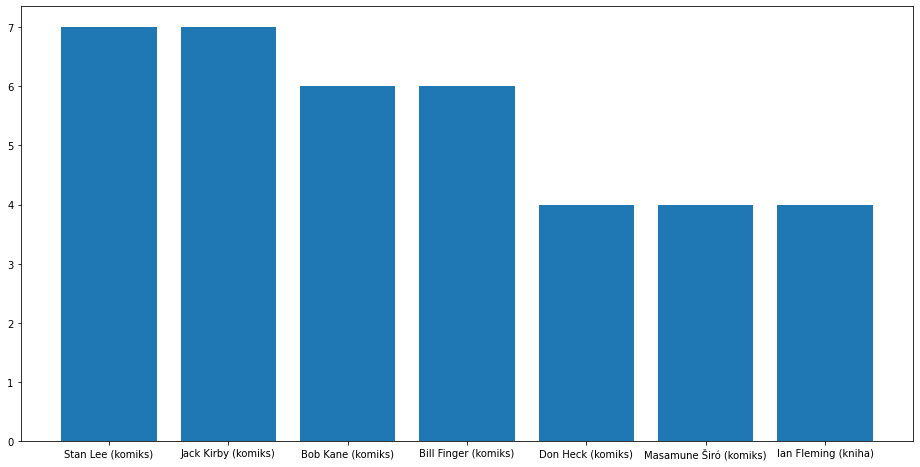

In [226]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(based_on).most_common(7)]
y = [x[1] for x in Counter(based_on).most_common(7)]

plt.bar(x, y)

## Související žánry

<BarContainer object of 11 artists>

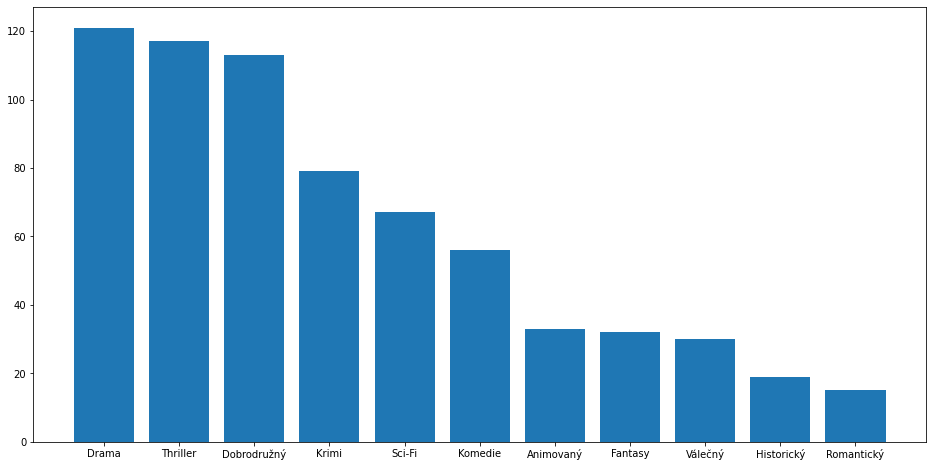

In [227]:
plt.figure(figsize=(16,8))
removed_genre = Counter(genres).most_common(12)
removed_genre.pop(0)

x = [x[0] for x in removed_genre]
y = [x[1] for x in removed_genre]

plt.bar(x, y)

## Země původu

<BarContainer object of 7 artists>

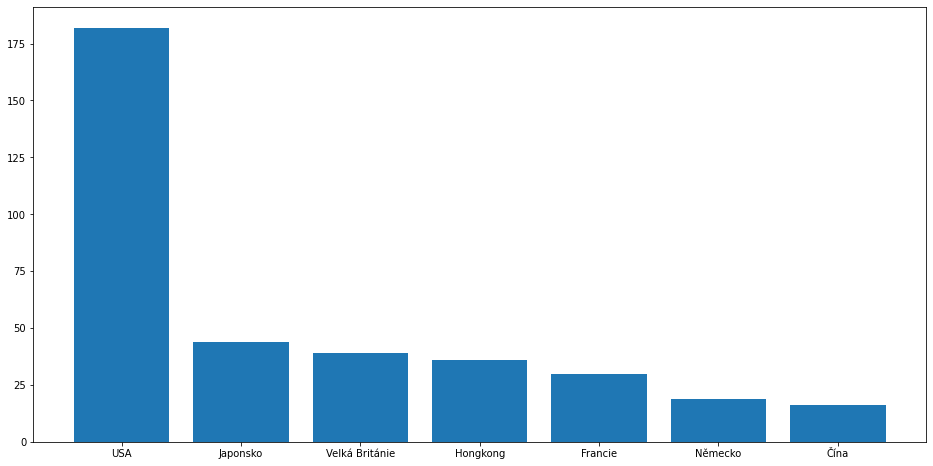

In [228]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(origin).most_common(7)]
y = [x[1] for x in Counter(origin).most_common(7)]

plt.bar(x, y)

## Vývoj počtu filmů v čase

<BarContainer object of 68 artists>

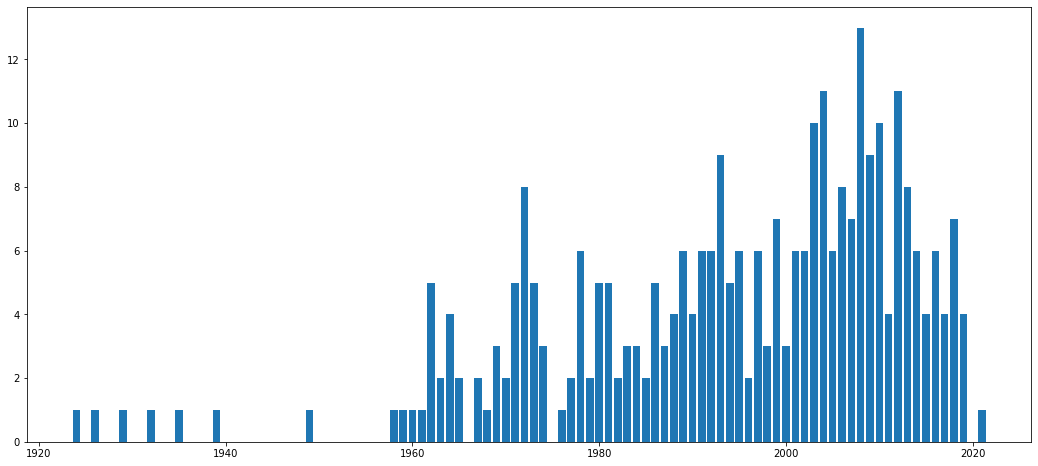

In [229]:
plt.figure(figsize=(18,8))

x = [x[0] for x in Counter(year).most_common()]
y = [x[1] for x in Counter(year).most_common()]

plt.bar(x, y)

## Režisér

<BarContainer object of 8 artists>

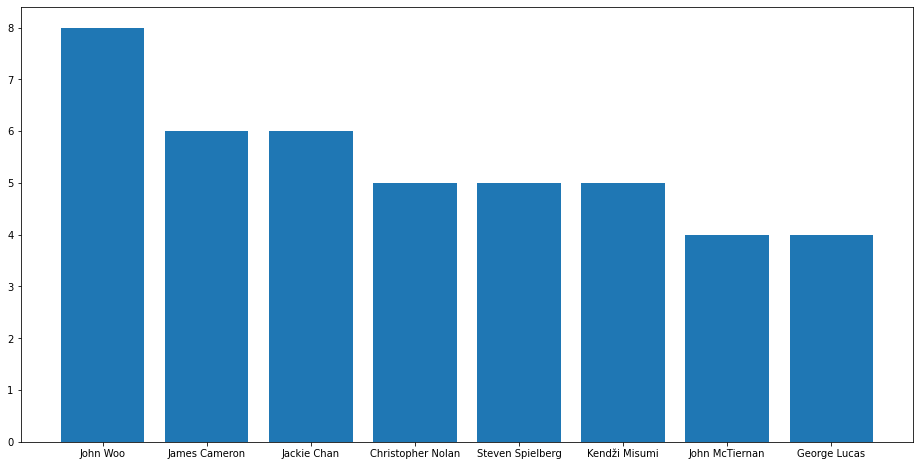

In [230]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(directors).most_common(8)]
y = [x[1] for x in Counter(directors).most_common(8)]

plt.bar(x, y)

## Scénarista

<BarContainer object of 8 artists>

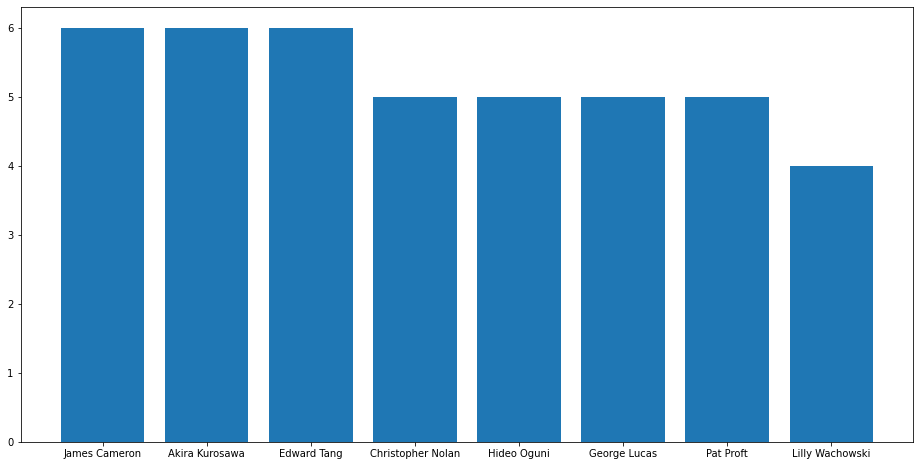

In [231]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(scenarists).most_common(8)]
y = [x[1] for x in Counter(scenarists).most_common(8)]

plt.bar(x, y)

## Herec

<BarContainer object of 8 artists>

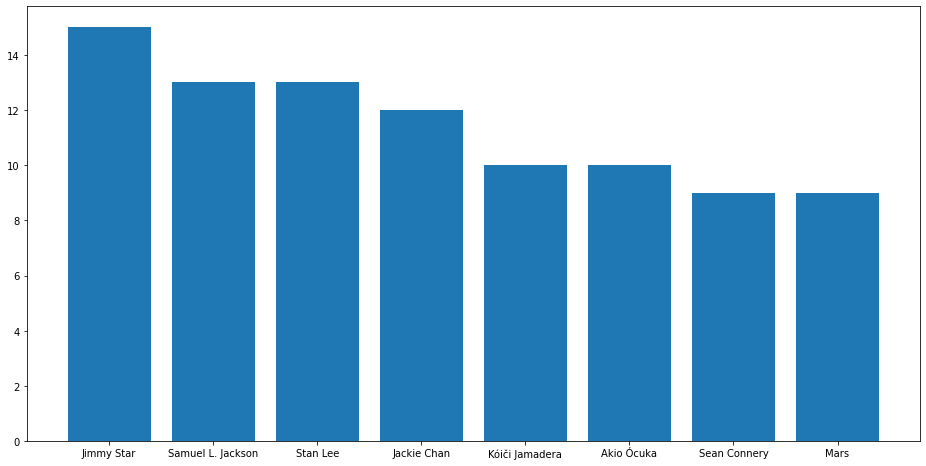

In [232]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(actors).most_common(8)]
y = [x[1] for x in Counter(actors).most_common(8)]

plt.bar(x, y)

## Hudba

<BarContainer object of 8 artists>

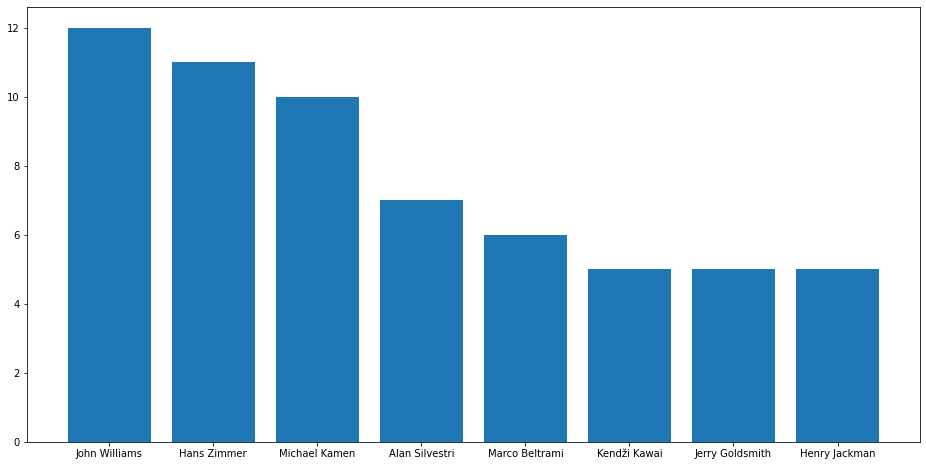

In [233]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(musicians).most_common(8)]
y = [x[1] for x in Counter(musicians).most_common(8)]

plt.bar(x, y)

## Produkce

<BarContainer object of 8 artists>

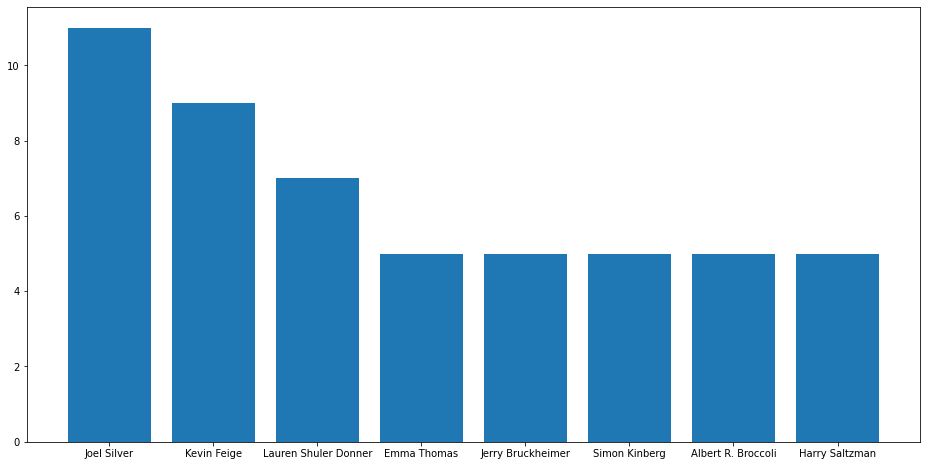

In [234]:
plt.figure(figsize=(16,8))

x = [x[0] for x in Counter(producers).most_common(8)]
y = [x[1] for x in Counter(producers).most_common(8)]

plt.bar(x, y)